### Section 2

2.1 Import Libraries

In [82]:
# Data wrangling
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
# Off FutureWarnings
import warnings 
warnings.filterwarnings('ignore')
#Resampling
from imblearn.over_sampling import SMOTENC 
from sklearn.utils import class_weight
#Dimension Reduction
from sklearn.decomposition import PCA
# Preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# Models Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
# Model evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
# Save model
import pickle

2.2 Upload Dataframe

In [83]:
## Upload df
df = pd.read_csv('data.csv') 
pd.options.mode.chained_assignment = None
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [84]:
df['Product ID'].nunique()

10000

2.3 Check for duplicates

In [85]:
# Verify if the data has duplicate values 
data_duplicates = df.duplicated().sum() 
print("Total duplicated values: ", data_duplicates)


Total duplicated values:  0


2.4 Check for missing values

In [86]:
# Verify if the data has missing values 
data_null = df.isnull().sum().sum() 
print("Total missing values: ", data_null)


Total missing values:  0


2.5 Verify data structure

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

2.6 Describe Numeric Features

In [88]:
## Numeric features analysis 
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


2.7 Verify "Target" variable distribution

In [89]:
# Cannot do 2.7 because there is no target variable

2.8 Verify "Failure" distribution

In [90]:
## Verify the proportion of column "Failure_type" 
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

### Section 3

3.1 Rename columns

In [91]:
rename_columns = { 'UDI':'ID',
'Air temperature [K]': 'Air_temperature',
'Process temperature [K]' : 'Process_temperature', 
'Rotational speed [rpm]' : 'Rotational_speed', 
'Torque [Nm]' : 'Torque',
'Tool wear [min]' : 'Tool_wear',
'Machine failure' : 'Machine_failure'
}
df.rename(rename_columns, axis = 1, inplace = True)

3.2 Identify redundant rows

In [92]:
PREDICTION_FEATURES = ['TWF', 'HDF', 'PWF', 'OSF','RNF']
sum_features = df[PREDICTION_FEATURES].sum(axis=1)
count_more_than_one = (sum_features > 1).sum()
count_more_than_one

24

In [93]:
mask = sum_features <= 1
df = df[mask]

In [94]:
## There are 24 rows where more than one failure is present.. I say we remove thses

In [95]:
# Analysing redundance value, count failures on "Target" column
# count_failures = (df['Target'] == 1).sum()
# print('Number of failures:', count_failures)
# # Sum of occurrences of 'Failure_type' other than 'No Failure'
# sum_failures = df.loc[(df['Failure_type'] != 'No Failure') & (df['Target'] == 1), 'Failure_type'].count()
# print('Sum of failures different of "No Failure":', sum_failures)

## Have to modify this


3.3 Remove redundant rows

In [96]:
# Filter the rows with has 1 in the column "Target" and 'No Failure' in the column 'Failure_type' rows_to_remove = df[(df['Target'] == 1) & (df['Failure_type'] == 'No Failure')]
# Remove this filtered row in the main df
# df.drop(rows_to_remove.index, inplace=True)

# Have to modify this

3.4 Remove unecessary columns

In [97]:
df.columns

Index(['ID', 'Product ID', 'Type', 'Air_temperature', 'Process_temperature',
       'Rotational_speed', 'Torque', 'Tool_wear', 'Machine_failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [98]:
#Removing unnecessary columnds
drop_columns = ["ID", "Product ID"] 
df.drop(drop_columns, axis = 1, inplace = True)

3.5 Remove Random Failures

3.6 Rename "type"

In [99]:
rename_type = {
    'L':'Low',
    'M':'Medium',
    'H':'High'
}
df['Type'].replace(rename_type, inplace = True)

3.7 Plot the "type" distribtution

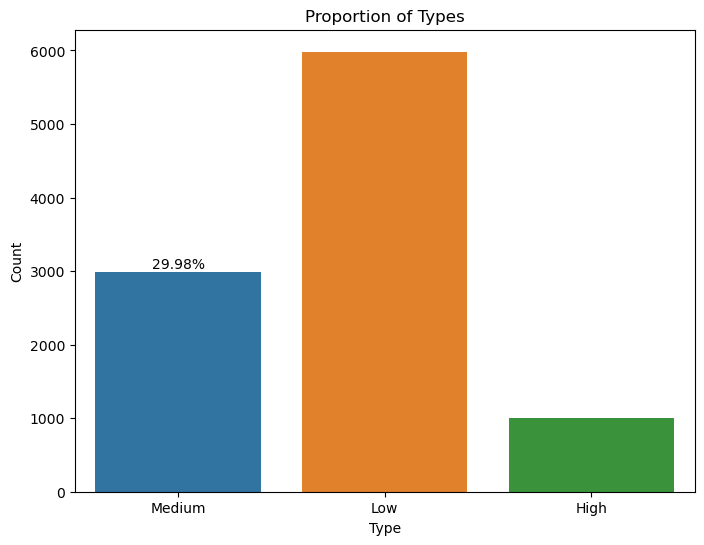

In [100]:
# Count types
tipo_contagem = df['Type'].value_counts()
# Show graphic
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Type') 
plt.title('Proportion of Types') 
plt.xlabel('Type') 
plt.ylabel('Count')
# Add as percentages as labels 
total = len(df['Type'])
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
    plt.show()

3.8 Plot Failure Type distribution

In [101]:
df['Failure_type'] = 'NF'
df.loc[(df['Machine_failure'] == 1) & (sum_features > 0), 'Failure_type'] = df[PREDICTION_FEATURES].idxmax(axis=1)
df.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF,Failure_type
0,Medium,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,NF
1,Low,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,NF
2,Low,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,NF
3,Low,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,NF
4,Low,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,NF


3.9 Plot histogram

In [102]:
df.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF', 'Failure_type'],
      dtype='object')

In [103]:
NUMERIC_FEATURES = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']
CATEGORIC_FEATURES = ['Type']

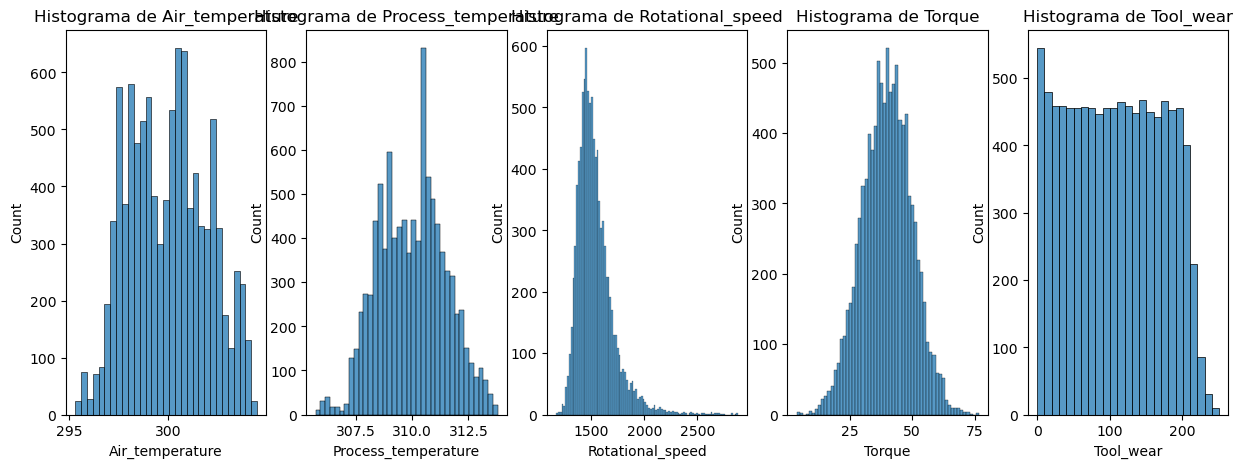

In [104]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))
# Plot histograms
for i, feature in enumerate(NUMERIC_FEATURES):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Histograma de {feature}')
# Adjust subplot plt.tight_layout()
# Show histogram
plt.show()
# # Create the figure and axess
# fig, axes = plt.subplots(nrows=1, ncols=len(NUMERIC_FEATURES), figsize=(15, 5))
# Plot boxplot side by side
# for i, feature in enumerate(NUMERIC_FEATURES):
#     sns.boxplot(data=df, y=feature, ax=axes[i]) 
#     axes[i].set_title(f'Boxplot de {feature}')
# Adjust subplot plt.tight_layout()
# Show boxplots
# plt.show()

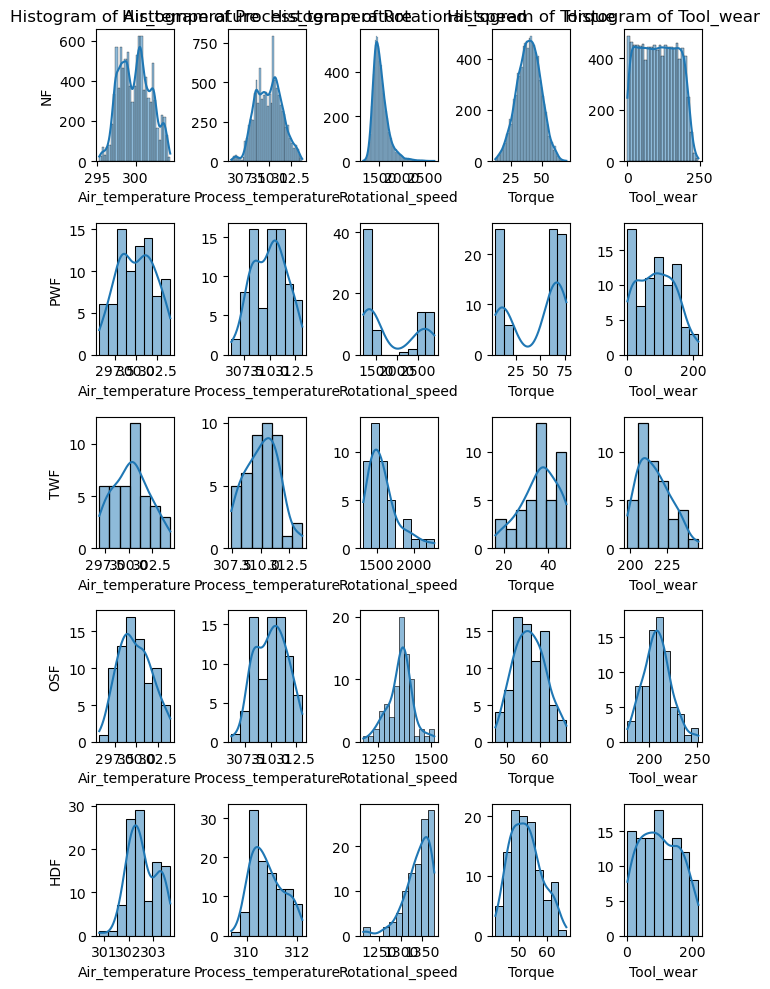

In [105]:
# Identify unique types and numeric columns
failure_types = [df['Failure_type'].unique()]

# Create subplots
fig, axes = plt.subplots(nrows=len(failure_types), ncols=len(NUMERIC_FEATURES), figsize=(7, 2*len(failure_types)))

# Plot histograms
for row, t in enumerate(failure_types):
    filtered_df = df[df['Failure_type'] == t]
    for col, feature in enumerate(NUMERIC_FEATURES):
        sns.histplot(data=filtered_df, x=feature, ax=axes[row, col], kde=True)
        if row == 0:
            axes[row, col].set_title(f'Histogram of {feature}')
        if col == 0:
            axes[row, col].set_ylabel(f'{t}')
        else:
            axes[row, col].set_ylabel('')

# Adjust subplot layout
plt.tight_layout()

# Show histogram
plt.show()


In [106]:
df.to_csv('cleaned_data.csv')

3.12 Scale and encode

In [107]:
# Create preprocessor ColumnTransformer to do OneHotEncoder for CATEGORIC_FEATURES and StandardScaler() for NUMERIC_FEATURES
# Define the pipelines for numeric and categorical transformations
num_pipeline = Pipeline([
    ('num_features', StandardScaler()) 
    ])
cat_pipeline = Pipeline([ 
    ('cat_features', OneHotEncoder())
    ])
# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_trans', num_pipeline, NUMERIC_FEATURES),
    ('cat_trans', cat_pipeline, CATEGORIC_FEATURES) ])
# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)
# Converting the transformed data back to a dataframe for easier visualization
# The transformed data will have new column names, especially for the one hot encoded categories 
encoded_feature_names = preprocessor.named_transformers_['cat_trans'].get_feature_names_out(CATEGORIC_FEATURES) 
new_column_names = list(NUMERIC_FEATURES) + list(encoded_feature_names)
df_transformed = pd.DataFrame(df_transformed, columns=new_column_names)
df_transformed.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_High,Type_Low,Type_Medium
0,-0.951551,-0.946692,0.065483,0.289789,-1.695147,0.0,0.0,1.0
1,-0.901538,-0.879314,-0.732576,0.643119,-1.647949,0.0,1.0,0.0
2,-0.951551,-1.014071,-0.230301,0.956069,-1.616484,0.0,1.0,0.0
3,-0.901538,-0.946692,-0.593055,-0.043351,-1.585019,0.0,1.0,0.0
4,-0.901538,-0.879314,-0.732576,0.007125,-1.553553,0.0,1.0,0.0


3.13 PCA Analysis

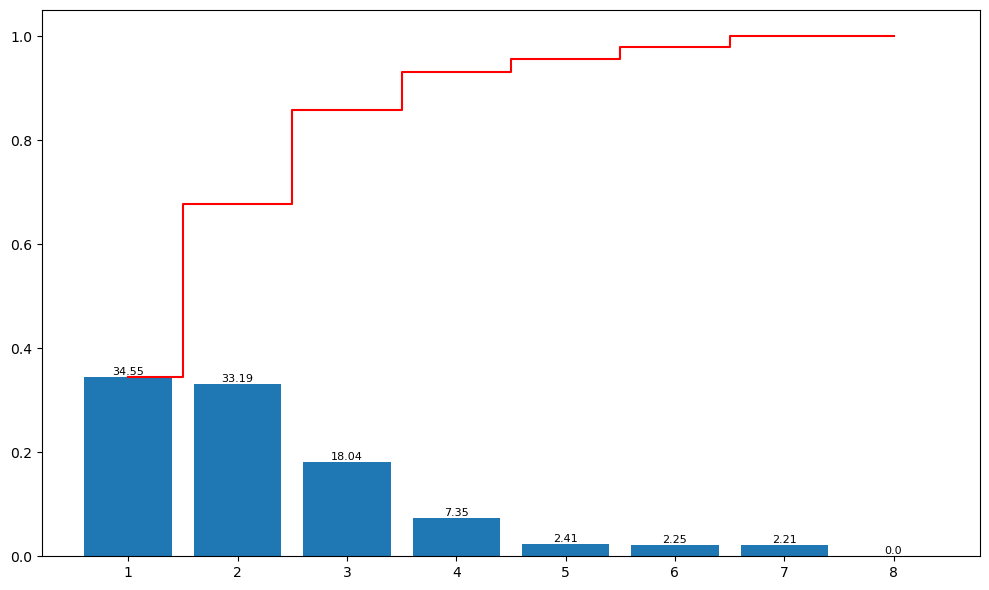

In [108]:
# Define PCA function
pca = PCA()
pca.fit(df_transformed) # Assumindo que df_transformed é o seu DataFrame transformado

# PCA variance explained
exp_var = pca.explained_variance_ratio_ 
cum_exp_var = exp_var.cumsum()

# Number of components 
n_pca_components = len(exp_var)

# Create the graphic
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, n_pca_components + 1), exp_var, align='center', label='Individual explained variance') 
plt.step(range(1, n_pca_components + 1), cum_exp_var, where='mid', label='Cumulative explained variance', color='red')

# Add labels in each bar 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval*100, 2), va='bottom', ha='center', fontsize=8)

# Adjust others elements of the graphic plt.ylabel('Explained variance percentage') plt.xlabel('Principal component index') plt.xticks(ticks=list(range(1, n_pca_components + 1))) plt.title('PCA Explained Variance') plt.legend(loc='best')
plt.tight_layout() 
plt.show()

In [109]:
#Consider using 5 componenets.. above 95% is good
cum_exp_var

array([0.34548569, 0.6774101 , 0.85783457, 0.93134567, 0.95541723,
       0.97792959, 1.        , 1.        ])

3.14 Understanding PCA components

### Section 4

In [110]:
from sklearn.metrics import f1_score 
def get_metrics(y_true, y_pred):
    # Calculating F1 scores for each class
    f1_scores_per_class = f1_score(y_true, y_pred, average=None)
    dict_metrics = {
    'Accuracy': accuracy_score(y_true, y_pred),
    'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
    'Macro Recall': recall_score(y_true, y_pred, average='macro'), 'Macro Precision': precision_score(y_true, y_pred, average='macro'), 'Macro F1': f1_score(y_true, y_pred, average='macro'),
    'F1 Scores per Class': f1_scores_per_class
    }
    return dict_metrics

4.2 Train and test

In [111]:
df_model = df.copy()
X = df_model[NUMERIC_FEATURES + CATEGORIC_FEATURES]
y = df_model['Failure_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

4.3 Create model with PCA and class weight

In [112]:
# Creating pipeline with PCA analysis and balanced class 
pip_model_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=4)),
    ('model', RandomForestClassifier(random_state=2023))
    ])
# Fit pipeline with PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_pca.fit(X_train, y_train, model__sample_weight=weights)
# Generate Predictions using the correctly fitted pipeline 
y_pred = pip_model_pca.predict(X_test)
# Evaluate Metrics
metrics = get_metrics(y_test, y_pred)
# View Results
metrics

{'Accuracy': 0.9729458917835672,
 'Balanced Accuracy': 0.33411037283130307,
 'Macro Recall': 0.33411037283130307,
 'Macro Precision': 0.6044758539458186,
 'Macro F1': 0.39610336740283,
 'F1 Scores per Class': array([0.08333333, 0.98621042, 0.47619048, 0.43478261, 0.        ])}

In [113]:
# Creating pipeline with PCA analysis and balanced class 
pip_model_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5)),
    ('model', RandomForestClassifier(random_state=2023))
    ])
# Fit pipeline with PCA
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pip_model_pca.fit(X_train, y_train, model__sample_weight=weights)
# Generate Predictions using the correctly fitted pipeline 
y_pred = pip_model_pca.predict(X_test)
# Evaluate Metrics
metrics = get_metrics(y_test, y_pred)
# View Results
metrics

{'Accuracy': 0.9734468937875751,
 'Balanced Accuracy': 0.3466103728313031,
 'Macro Recall': 0.3466103728313031,
 'Macro Precision': 0.6200505050505051,
 'Macro F1': 0.4071080116507403,
 'F1 Scores per Class': array([0.08695652, 0.98646232, 0.54545455, 0.41666667, 0.        ])}

4.4 Create Model without PCA and with class weights

In [114]:
# Creating pipeline without PCA analysis and balanced class with parameter by model 
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023)) 
])

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train) 
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights)

# Step 1: Generate Predictions
y_pred = pip_model_no_pca.predict(X_test)

# Step 2: Evaluate Metrics
metrics = get_metrics(y_test, y_pred)

# Step 3: View Results metrics
metrics

{'Accuracy': 0.9594188376753507,
 'Balanced Accuracy': 0.7955343300110742,
 'Macro Recall': 0.7955343300110742,
 'Macro Precision': 0.5686361626878869,
 'Macro F1': 0.6495499123816401,
 'F1 Scores per Class': array([0.8       , 0.9787234 , 0.69565217, 0.73170732, 0.04166667])}

4.5 Create Model without PCA and with SMOTE

In [115]:
# Get categorical feature indices for SMOTENC
categorical_features_indices = [i for i, feature in enumerate(NUMERIC_FEATURES + CATEGORIC_FEATURES) if feature in CATEGORIC_FEATURES]

# Creating the new pipeline with SMOTENC using ImbPipeline 
pip_model_smotenc = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smotenc', SMOTENC(categorical_features=categorical_features_indices, random_state=42)), 
    ('model', GradientBoostingClassifier(random_state=2023))
])

# Fit the pipeline 
pip_model_smotenc.fit(X_train, y_train)
# Generate Predictions
y_pred = pip_model_smotenc.predict(X_test)
# Evaluate Metrics
metrics = get_metrics(y_test, y_pred)
# View Results
metrics

{'Accuracy': 0.9493987975951904,
 'Balanced Accuracy': 0.8402842377260982,
 'Macro Recall': 0.8402842377260982,
 'Macro Precision': 0.5809297691555756,
 'Macro F1': 0.6593256290143674,
 'F1 Scores per Class': array([0.89361702, 0.97330161, 0.68085106, 0.66666667, 0.08219178])}

4.6 Grid Search

In [116]:
# Creating pipeline without PCA analysis and balanced class with parameter by model 
pip_model_no_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(random_state=2023)) 
])

# Fit pipeline with sample weights
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train) 
pip_model_no_pca.fit(X_train, y_train, model__sample_weight=weights)

# Updated parameters for GridSearchCV 
params = {
    'model': [
    LogisticRegressionCV(max_iter=500, random_state=2023), 
    RandomForestClassifier(random_state=2023), 
    GradientBoostingClassifier(random_state=2023), 
    DummyClassifier()
    ], 
}

# Running GridSearchCV
grid = GridSearchCV(pip_model_no_pca, params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1) 
grid.fit(X_train, y_train)

# Collecting and printing the results
results = pd.DataFrame(grid.cv_results_)
best_model_index = results['mean_test_score'].idxmax() 
best_model_params = results.loc[best_model_index, 'params']
# View results 
print("Best model:")
print(best_model_params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best model:
{'model': GradientBoostingClassifier(random_state=2023)}


4.7 Tuning the Model

In [117]:
fine_tune_params = {
'model__n_estimators': [50, 100, 200, 300, 400, 500],
'model__max_depth': [None, 5, 10, 15, 20] }

# Running a new GridSearchCV for fine-tuning
fine_tune_grid = GridSearchCV(pip_model_no_pca, fine_tune_params, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
fine_tune_grid.fit(X_train, y_train)

# Collecting and printing the fine-tuned results
fine_tuned_results = pd.DataFrame(fine_tune_grid.cv_results_) 
fine_tuned_best_index = fine_tuned_results['mean_test_score'].idxmax()
fine_tuned_best_params = fine_tuned_results.loc[fine_tuned_best_index, 'params']

# Print best model parameters
print("Best fine-tuned model parameters:") 
print(fine_tuned_best_params)
# Finding the best estimator paramaters 
tuned_model = fine_tune_grid.best_estimator_ 
y_pred = tuned_model.predict(X_test)
# View new perfomance (focus on F1-score) 
get_metrics(y_test, y_pred)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best fine-tuned model parameters:
{'model__max_depth': 5, 'model__n_estimators': 400}


{'Accuracy': 0.9864729458917836,
 'Balanced Accuracy': 0.7172120708748616,
 'Macro Recall': 0.7172120708748616,
 'Macro Precision': 0.6969487444100447,
 'Macro F1': 0.7062532255779402,
 'F1 Scores per Class': array([0.92682927, 0.99302866, 0.82352941, 0.78787879, 0.        ])}

4.8 Confustion Matrix

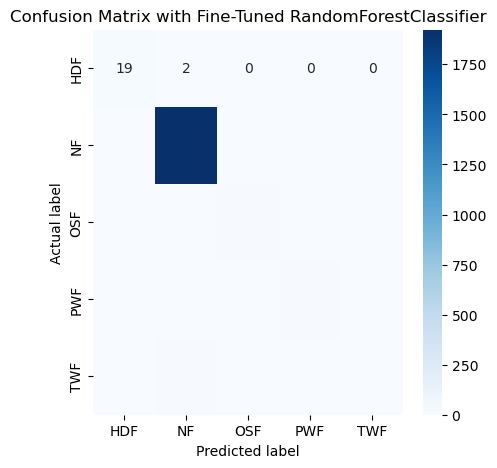

In [118]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 5)) # Larger figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # Use 'd' to format numbers as integers
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_pred)) 
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Fine-Tuned RandomForestClassifier') 
plt.show()

### Deployement

In [119]:
# with open('../predictive-maintenance/model.pkl', 'wb') as model_file: 
#     pickle.dump(tuned_model, model_file)
# import pickle
# import streamlit as st 
# import pandas as pd

In [120]:
df

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF,Failure_type
0,Medium,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,NF
1,Low,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,NF
2,Low,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,NF
3,Low,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,NF
4,Low,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Medium,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,NF
9996,High,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,NF
9997,Medium,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,NF
9998,High,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,NF
